In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('kc_house_data.csv', index_col = 0)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [3]:
data.shape

(21597, 20)

In [4]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
data['yr_renovated'] = data["yr_renovated"].fillna(0)

In [6]:
data = data[~data['sqft_basement'].isin(['?'])]
data.shape

(21143, 20)

In [7]:
data['bathrooms']=round(data['bathrooms']*2)/2

<ipython-input-7-67c3fce2bafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathrooms']=round(data['bathrooms']*2)/2


In [8]:
data['bathrooms'].value_counts()

2.0    6891
2.5    5255
1.0    3837
3.0    2470
1.5    1422
3.5     719
4.0     366
4.5      96
5.0      55
6.0      12
5.5       9
8.0       3
0.5       3
6.5       2
7.0       2
7.5       1
Name: bathrooms, dtype: int64

In [9]:
data['sqft_basement']= data['sqft_basement'].astype(float, copy=False)

<ipython-input-9-1371d73c6840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_basement']= data['sqft_basement'].astype(float, copy=False)


In [10]:
data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)

<ipython-input-10-1df61e2bf4a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)


In [11]:
data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)

<ipython-input-11-534eb58d893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)


In [12]:
data['date'] = pd.to_datetime(data['date'])
data['month']= data['date'].dt.month
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))

<ipython-input-12-b9c90b28d6e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-12-b9c90b28d6e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']= data['date'].dt.month


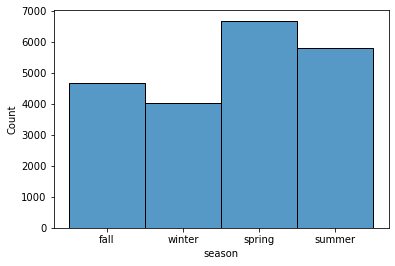

In [13]:
sns.histplot(data=data['season']);

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21143 non-null  datetime64[ns]
 1   price          21143 non-null  float64       
 2   bedrooms       21143 non-null  int64         
 3   bathrooms      21143 non-null  float64       
 4   sqft_living    21143 non-null  int64         
 5   sqft_lot       21143 non-null  int64         
 6   floors         21143 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           21082 non-null  float64       
 9   condition      21143 non-null  int64         
 10  grade          21143 non-null  int64         
 11  sqft_above     21143 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21143 non-null  int64         
 14  yr_renovated   21143 non-null  float64       
 15  zipco

In [15]:
data.drop(['waterfront','view', 'sqft_above', 'zipcode','month', 'yr_renovated','sqft_basement'], axis=1, inplace=True)

In [16]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'is_renovated',
       'season'],
      dtype='object')

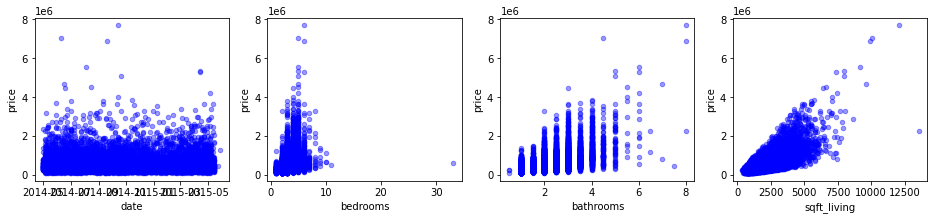

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'bedrooms', 'bathrooms', 'sqft_living'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

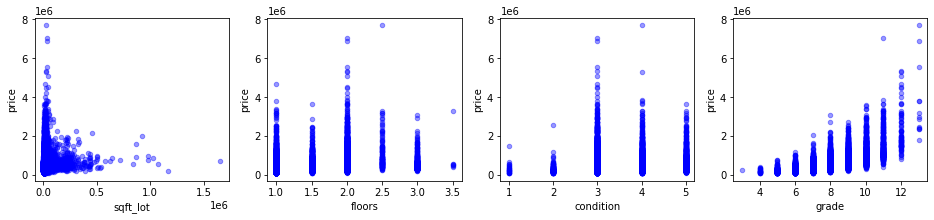

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'floors', 'condition', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

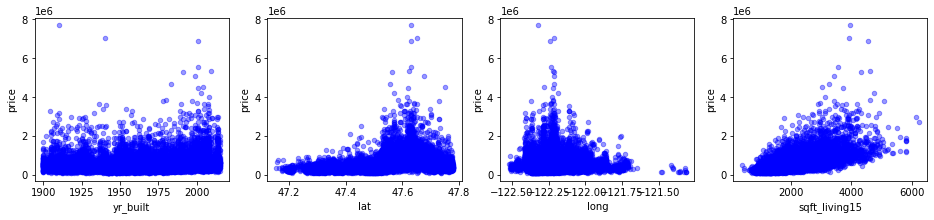

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'lat', 'long', 'sqft_living15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


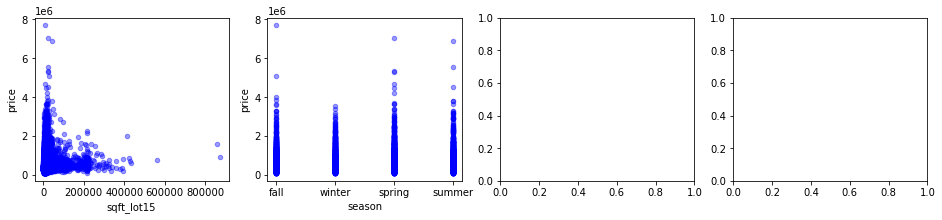

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15','season'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [21]:
#pd.plotting.scatter_matrix(data,figsize  = [20, 20]);
#plt.show()

In [22]:
discrete_features = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'is_renovated','has_basement', 'season']

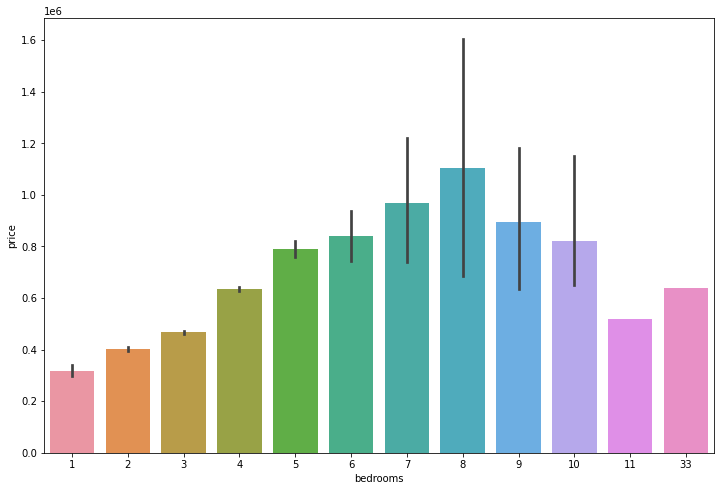

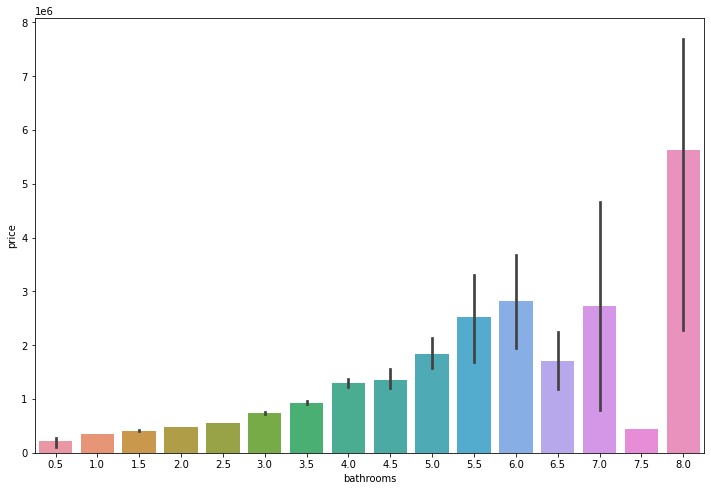

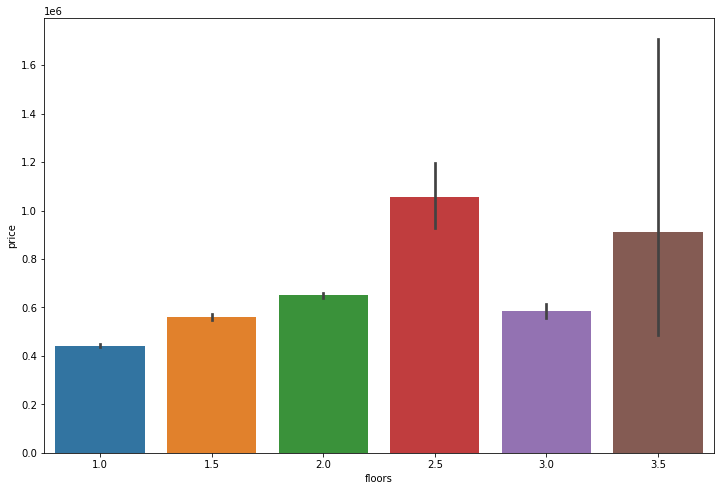

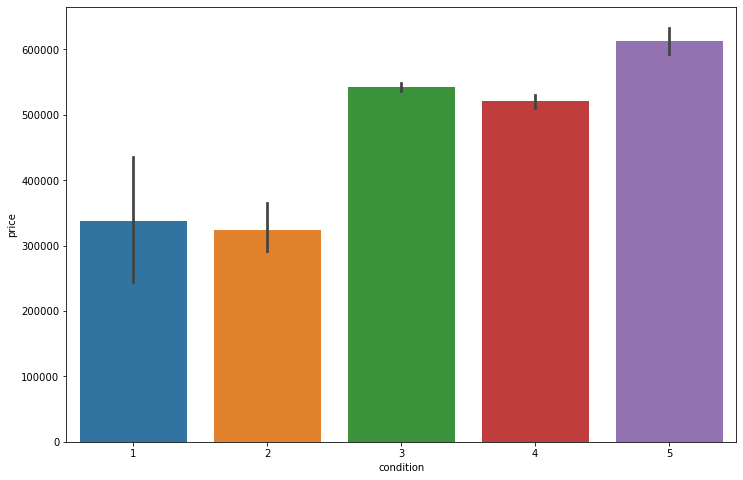

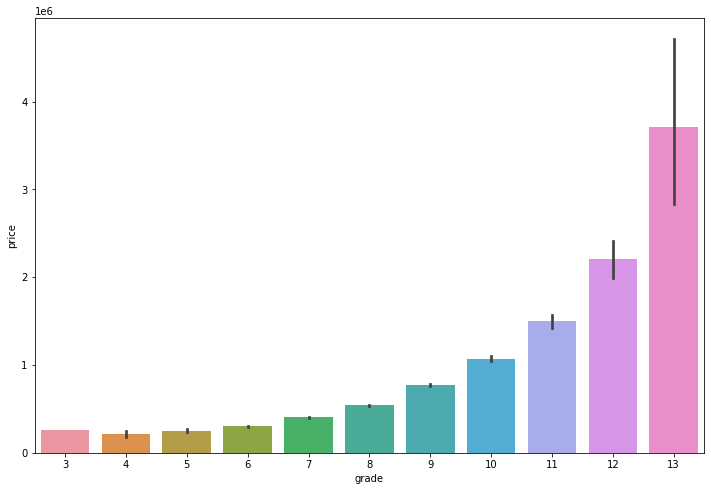

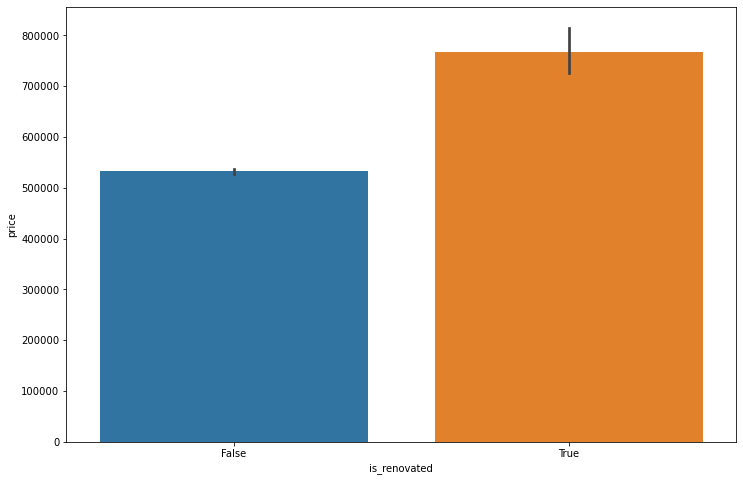

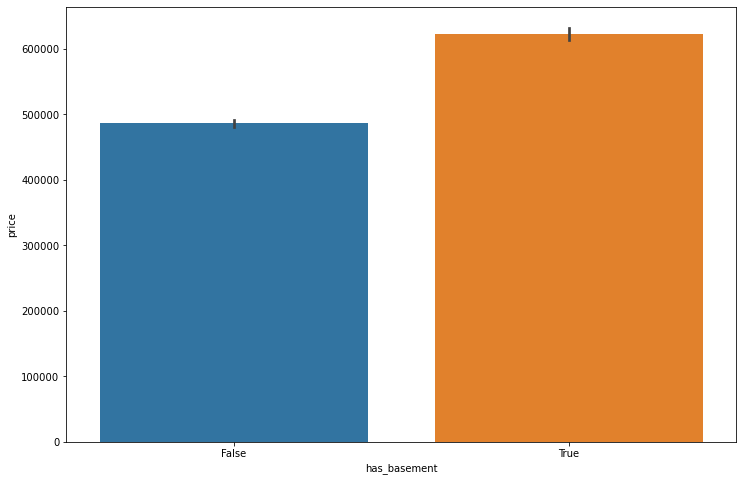

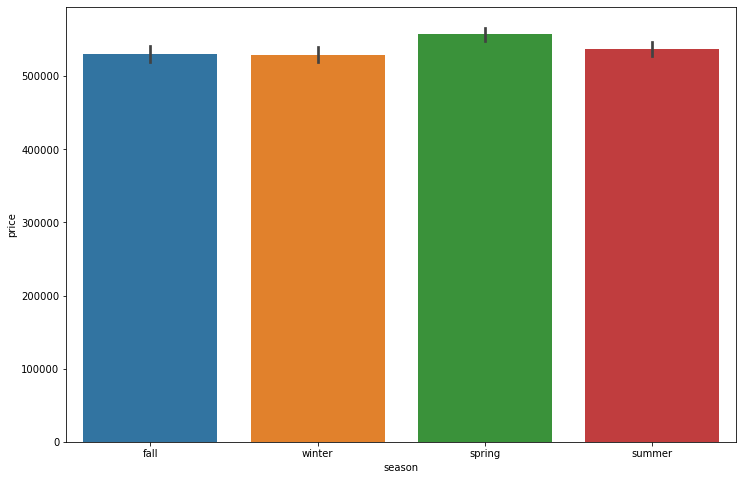

In [23]:
for feature in discrete_features:
    plt.figure(figsize=(12,8))
    sns.barplot(x=feature, y='price', data=data)

In [24]:
continuous_features = [feature for feature in data.columns if feature not in discrete_features+['price']+['date']]
continuous_features

['sqft_living',
 'sqft_lot',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

<Figure size 432x288 with 0 Axes>

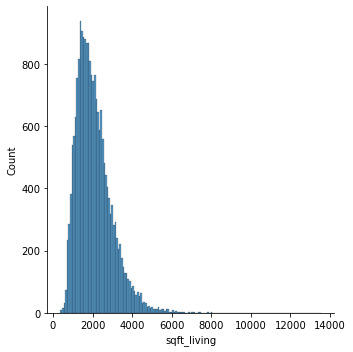

<Figure size 432x288 with 0 Axes>

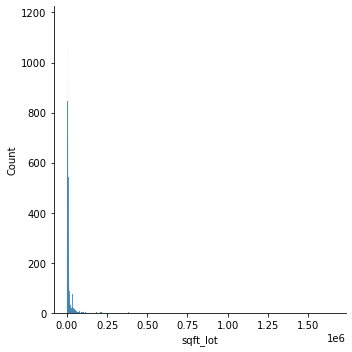

<Figure size 432x288 with 0 Axes>

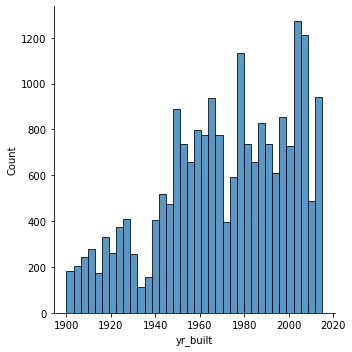

<Figure size 432x288 with 0 Axes>

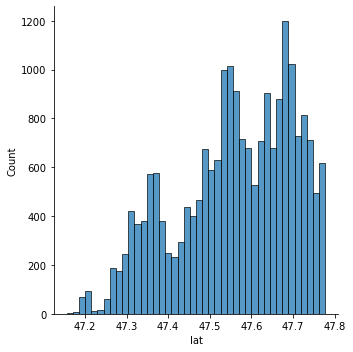

<Figure size 432x288 with 0 Axes>

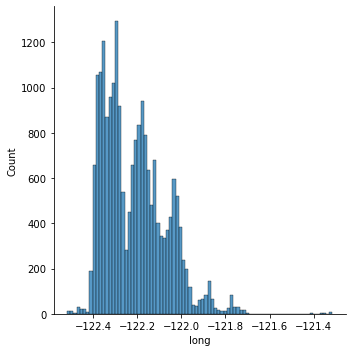

<Figure size 432x288 with 0 Axes>

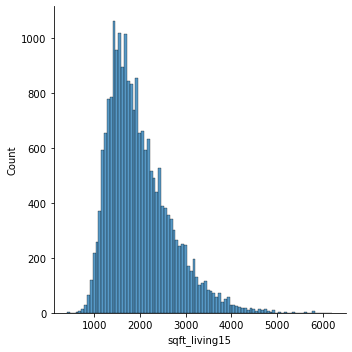

<Figure size 432x288 with 0 Axes>

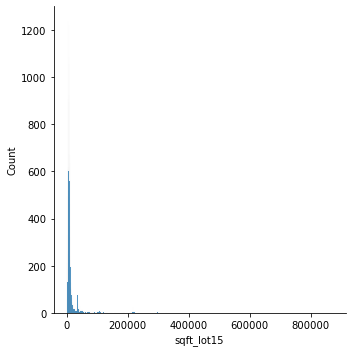

In [25]:
for feature in continuous_features:
    plt.figure()
    sns.displot(data[feature])

In [26]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit

In [27]:
def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit

In [28]:
data = data[(data['sqft_living'] >= lower_limit(data['sqft_living'])) & (data['sqft_living'] <= upper_limit(data['sqft_living']))]

In [29]:
data = data[(data['sqft_lot'] >= lower_limit(data['sqft_lot'])) & (data['sqft_lot'] <= upper_limit(data['sqft_lot']))]

In [30]:
data = data[(data['sqft_living15'] >= lower_limit(data['sqft_living15'])) & (data['sqft_living15'] <= upper_limit(data['sqft_living15']))]

In [31]:
data = data[(data['sqft_lot15'] >= lower_limit(data['sqft_lot15'])) & (data['sqft_lot15'] <= upper_limit(data['sqft_lot15']))]

In [32]:
data.shape

(20132, 17)

In [33]:
data['bedrooms'].max()

33

In [34]:
data[(data['bedrooms']==33)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,sqft_living15,sqft_lot15,has_basement,is_renovated,season
id,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.0,33,2.0,1620,6000,1.0,5,7,1947,47.6878,-122.331,1330,4700,True,False,spring


In [35]:
data = data[(data['bedrooms']!=33)]

<Figure size 432x288 with 0 Axes>

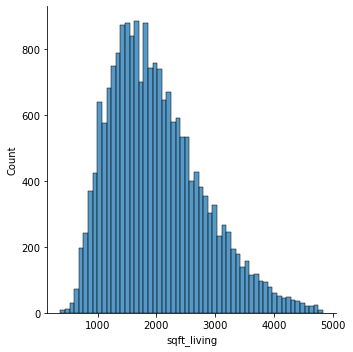

<Figure size 432x288 with 0 Axes>

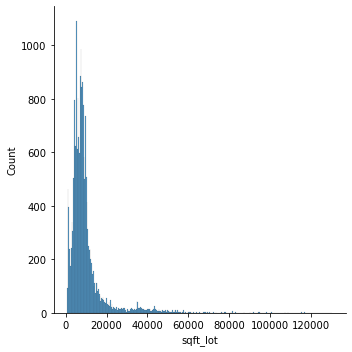

<Figure size 432x288 with 0 Axes>

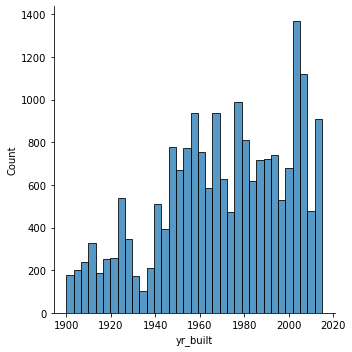

<Figure size 432x288 with 0 Axes>

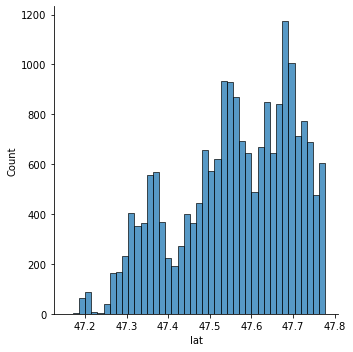

<Figure size 432x288 with 0 Axes>

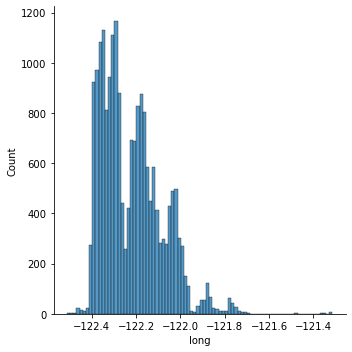

<Figure size 432x288 with 0 Axes>

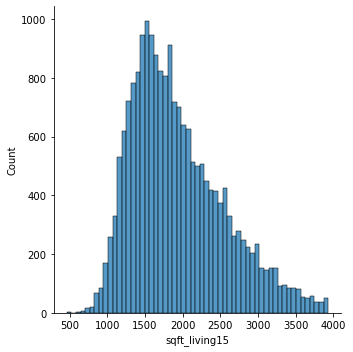

<Figure size 432x288 with 0 Axes>

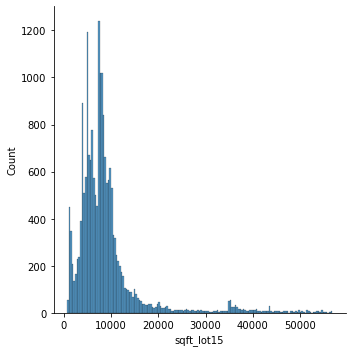

In [36]:
for feature in continuous_features:
    plt.figure()
    sns.displot(data[feature])

In [37]:
price_corrs = data.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.646800
grade            0.643538
sqft_living15    0.559596
bathrooms        0.460189
lat              0.363181
bedrooms         0.294626
floors           0.252868
has_basement     0.180632
is_renovated     0.126962
sqft_lot15       0.121899
sqft_lot         0.114814
condition        0.057957
yr_built         0.022790
long             0.003159
Name: price, dtype: float64

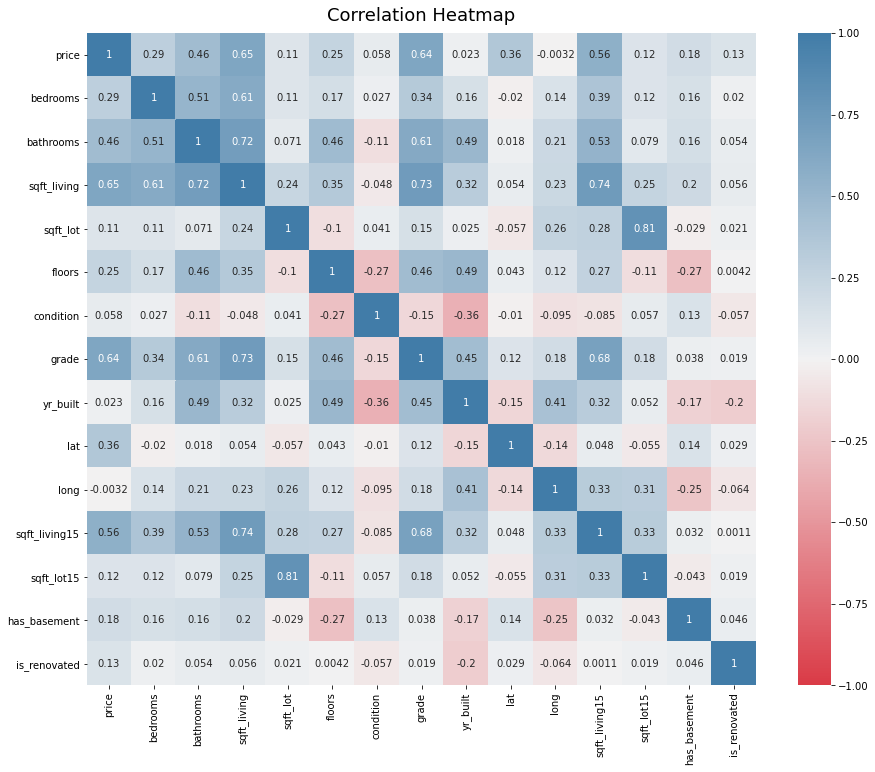

In [38]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# Some Dummies

In [39]:
ohe = OneHotEncoder(drop='first')

In [40]:
data.drop(labels = ['sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [41]:
categoricals= ['season', 'has_basement', 'is_renovated']

In [42]:
data['season'].value_counts()

spring    6333
summer    5524
fall      4425
winter    3849
Name: season, dtype: int64

In [43]:
data['has_basement'].value_counts()

False    12231
True      7900
Name: has_basement, dtype: int64

In [44]:
data['is_renovated'].value_counts()

False    19444
True       687
Name: is_renovated, dtype: int64

In [45]:
dummy = pd.get_dummies(data, columns=['is_renovated', 'has_basement', 'season'], drop_first=True)
dummy.drop(labels=['date'], axis=1, inplace=True)
dummy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True,season_spring,season_summer,season_winter
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.0,1180,5650,1.0,3,7,1955,47.5112,-122.257,0,0,0,0,0
6414100192,538000.0,3,2.0,2570,7242,2.0,3,7,1951,47.7210,-122.319,1,1,0,0,0
5631500400,180000.0,2,1.0,770,10000,1.0,3,6,1933,47.7379,-122.233,0,0,0,0,1
2487200875,604000.0,4,3.0,1960,5000,1.0,5,7,1965,47.5208,-122.393,0,1,0,0,0
1954400510,510000.0,3,2.0,1680,8080,1.0,3,8,1987,47.6168,-122.045,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.5,1530,1131,3.0,3,8,2009,47.6993,-122.346,0,0,1,0,0
6600060120,400000.0,4,2.5,2310,5813,2.0,3,8,2014,47.5107,-122.362,0,0,0,0,1
1523300141,402101.0,2,1.0,1020,1350,2.0,3,7,2009,47.5944,-122.299,0,0,1,0,0


In [46]:
dummy_log = pd.DataFrame.copy(dummy)
dummy_log

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True,season_spring,season_summer,season_winter
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.0,1180,5650,1.0,3,7,1955,47.5112,-122.257,0,0,0,0,0
6414100192,538000.0,3,2.0,2570,7242,2.0,3,7,1951,47.7210,-122.319,1,1,0,0,0
5631500400,180000.0,2,1.0,770,10000,1.0,3,6,1933,47.7379,-122.233,0,0,0,0,1
2487200875,604000.0,4,3.0,1960,5000,1.0,5,7,1965,47.5208,-122.393,0,1,0,0,0
1954400510,510000.0,3,2.0,1680,8080,1.0,3,8,1987,47.6168,-122.045,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.5,1530,1131,3.0,3,8,2009,47.6993,-122.346,0,0,1,0,0
6600060120,400000.0,4,2.5,2310,5813,2.0,3,8,2014,47.5107,-122.362,0,0,0,0,1
1523300141,402101.0,2,1.0,1020,1350,2.0,3,7,2009,47.5944,-122.299,0,0,1,0,0


In [47]:
log_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
for col in dummy_log.columns:
    if col in log_col:
        new_log = np.log(dummy_log[col])
        dummy_log[col] = new_log

new_log

id
7129300520    7.578145
6414100192    7.576097
5631500400    7.566828
2487200875    7.583248
1954400510    7.594381
                ...   
263000018     7.605392
6600060120    7.607878
1523300141    7.605392
291310100     7.602900
1523300157    7.604894
Name: yr_built, Length: 20131, dtype: float64

In [48]:
dummy_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True,season_spring,season_summer,season_winter
id,,,,,,,,,,,,,,,,
7129300520,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,1.098612,1.945910,7.578145,47.5112,-122.257,0,0,0,0,0
6414100192,13.195614,1.098612,0.693147,7.851661,8.887653,0.693147,1.098612,1.945910,7.576097,47.7210,-122.319,1,1,0,0,0
5631500400,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,1.098612,1.791759,7.566828,47.7379,-122.233,0,0,0,0,1
2487200875,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,1.609438,1.945910,7.583248,47.5208,-122.393,0,1,0,0,0
1954400510,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,1.098612,2.079442,7.594381,47.6168,-122.045,0,0,0,0,1


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'is_renovated_True'}>],
       [<AxesSubplot:title={'center':'has_basement_True'}>,
        <AxesSubplot:title={'center':'season_spring'}>,
        <AxesSubplot:title={'center':'season_summer'}>,
        <AxesSubplot:title={'center':'season_winter'}>]], dtype=object)

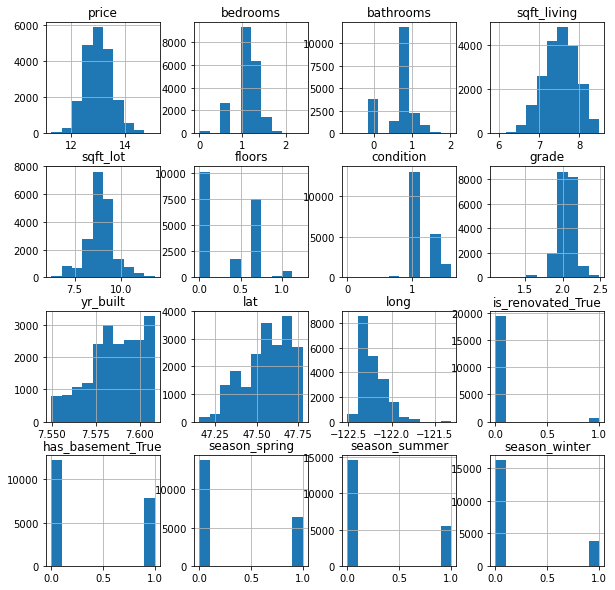

In [49]:
dummy_log.hist(figsize=[10,10])

In [50]:
dummy_log_scaled = (dummy_log - np.mean(dummy_log))/ np.std(dummy_log)
dummy_log_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True,season_spring,season_summer,season_winter
count,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04
mean,4.068917e-15,-1.785975e-16,-2.484835e-16,2.484835e-16,2.744613e-15,-7.906292e-17,-8.019239e-16,5.890188e-15,-5.619115e-14,-1.986941e-14,1.184221e-13,-3.670779e-17,-2.258941e-17,5.929719e-17,-7.023894e-17,2.717788e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-3.505238e+00,-4.176698e+00,-3.590787e+00,-4.004659e+00,-3.530010e+00,-9.431827e-01,-6.672159e+00,-6.513877e+00,-2.421498e+00,-2.938826e+00,-2.143975e+00,-1.879687e-01,-8.036789e-01,-6.774803e-01,-6.149592e-01,-4.862057e-01
25%,-6.992844e-01,-2.620552e-01,-7.050424e-01,-6.797864e-01,-4.980773e-01,-9.431827e-01,-6.206566e-01,-4.988830e-01,-6.525467e-01,-6.340162e-01,-8.122276e-01,-1.879687e-01,-8.036789e-01,-6.774803e-01,-6.149592e-01,-4.862057e-01
50%,-3.061457e-02,-2.620552e-01,5.061727e-02,3.517571e-02,3.826682e-02,-9.431827e-01,-6.206566e-01,-4.988830e-01,9.629831e-02,8.768469e-02,-1.573907e-01,-1.879687e-01,-8.036789e-01,-6.774803e-01,-6.149592e-01,-4.862057e-01
75%,6.498412e-01,7.630311e-01,6.367524e-01,7.235573e-01,4.394529e-01,1.025309e+00,9.639867e-01,4.490605e-01,8.703061e-01,8.513702e-01,6.151697e-01,-1.879687e-01,1.244278e+00,1.476058e+00,1.626124e+00,-4.862057e-01
max,4.167883e+00,4.367629e+00,3.522497e+00,2.380195e+00,3.873357e+00,2.614581e+00,2.193132e+00,3.327470e+00,1.503006e+00,1.561489e+00,6.663214e+00,5.320034e+00,1.244278e+00,1.476058e+00,1.626124e+00,2.056742e+00


In [51]:
y_log = dummy_log_scaled['price']
X_log = dummy_log_scaled.drop(['price'], axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [53]:
pred = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     2783.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:46:45   Log-Likelihood:                -12515.
No. Observations:               16104   AIC:                         2.506e+04
Df Residuals:                   16088   BIC:                         2.519e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0034      0.004     -0.826      0.409      -0.012       0.005
bedrooms             -0.0801      0.006    -14.201      0.000      -0.091      -0.069
bathrooms             0.0681      0.007      9.506      0.000       0.054       0.082
sqft_living           0.3906      0.009     42.399      0.000       0.373       0.409
sqft_lot             -0.0288      0.006     -5.143      0.000      -0.040      -0.018
floors                0.0618      0.006      9.819      0.000       0.049       0.074
condition             0.0782      0.005     17.084      0.000       0.069       0.087
grade                 0.4110      0.007     61.441      0.000       0.398       0.424
yr_built             -0.2337      0.006    -37.024      0.000      -0.246      -0.221
lat                   0.3730      0.004     84.774      0.000       0.364       0.382
long                  0.0153      0.005      3.025      0.002       0.005       0.025
is_renovated_True     0.0288      0.004      6.584      0.000       0.020       0.037
has_basement_True     0.0121      0.005      2.279      0.023       0.002       0.022
season_spring         0.0348      0.005      6.496      0.000       0.024       0.045
season_summer         0.0055      0.005      1.030      0.303      -0.005       0.016
season_winter         0.0335      0.005      6.562      0.000       0.023       0.043
==============================================================================
Omnibus:                      743.775   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1460.405
Skew:                           0.341   Prob(JB):                         0.00
Kurtosis:                       4.308   Cond. No.                         5.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
train_mse

0.2770457597293131

In [55]:
dummy_scaled = (dummy - np.mean(dummy))/ np.std(dummy)
dummy_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True,season_spring,season_summer,season_winter
count,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04
mean,3.106043e-17,-1.143589e-16,-1.468311e-16,2.823676e-17,7.906292e-17,1.016523e-16,-1.411838e-16,2.993096e-16,-8.583975e-16,-1.986941e-14,1.184221e-13,-3.670779e-17,-2.258941e-17,5.929719e-17,-7.023894e-17,2.717788e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.452766e+00,-2.637428e+00,-2.220706e+00,-2.065035e+00,-8.773141e-01,-8.984047e-01,-3.701990e+00,-4.238547e+00,-2.393546e+00,-2.938826e+00,-2.143975e+00,-1.879687e-01,-8.036789e-01,-6.774803e-01,-6.149592e-01,-4.862057e-01
25%,-6.547516e-01,-3.940011e-01,-8.301486e-01,-7.513856e-01,-4.543529e-01,-8.984047e-01,-6.362630e-01,-5.406104e-01,-6.590289e-01,-6.340162e-01,-8.122276e-01,-1.879687e-01,-8.036789e-01,-6.774803e-01,-6.149592e-01,-4.862057e-01
50%,-2.341315e-01,-3.940011e-01,-1.348698e-01,-1.577171e-01,-2.219130e-01,-8.984047e-01,-6.362630e-01,-5.406104e-01,8.919402e-02,8.768469e-02,-1.573907e-01,-1.879687e-01,-8.036789e-01,-6.774803e-01,-6.149592e-01,-4.862057e-01
75%,3.660418e-01,7.277124e-01,5.604090e-01,6.001575e-01,2.407489e-02,9.540776e-01,8.966008e-01,3.838738e-01,8.714270e-01,8.513702e-01,6.151697e-01,-1.879687e-01,1.244278e+00,1.476058e+00,1.626124e+00,-4.862057e-01
max,1.039110e+01,8.579707e+00,7.513197e+00,3.568500e+00,1.141122e+01,3.732801e+00,2.429465e+00,4.081811e+00,1.517620e+00,1.561489e+00,6.663214e+00,5.320034e+00,1.244278e+00,1.476058e+00,1.626124e+00,2.056742e+00


# Train

In [56]:
y = dummy_scaled['price']
X = dummy_scaled.drop(['price'], axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


16104 4027 16104 4027


In [59]:
pred = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1906.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:46:46   Log-Likelihood:                -14623.
No. Observations:               16104   AIC:                         2.928e+04
Df Residuals:                   16088   BIC:                         2.940e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0027      0.005     -0.577      0.564      -0.012       0.007
bedrooms             -0.0967      0.006    -15.589      0.000      -0.109      -0.085
bathrooms             0.0778      0.008      9.742      0.000       0.062       0.094
sqft_living           0.4263      0.009     44.948      0.000       0.408       0.445
sqft_lot             -0.0147      0.005     -2.805      0.005      -0.025      -0.004
floors                0.0343      0.006      5.332      0.000       0.022       0.047
condition             0.0740      0.005     14.085      0.000       0.064       0.084
grade                 0.4019      0.008     51.655      0.000       0.387       0.417
yr_built             -0.2462      0.007    -34.260      0.000      -0.260      -0.232
lat                   0.2471      0.005     49.569      0.000       0.237       0.257
long                 -0.0329      0.006     -5.814      0.000      -0.044      -0.022
is_renovated_True     0.0372      0.005      7.443      0.000       0.027       0.047
has_basement_True    -0.0076      0.006     -1.332      0.183      -0.019       0.004
season_spring         0.0237      0.006      3.881      0.000       0.012       0.036
season_summer        -0.0031      0.006     -0.505      0.614      -0.015       0.009
season_winter         0.0334      0.006      5.749      0.000       0.022       0.045
==============================================================================
Omnibus:                     9979.200   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           212455.172
Skew:                           2.606   Prob(JB):                         0.00
Kurtosis:                      20.013   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
train_mse

0.3599561412797509

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'is_renovated_True'}>],
       [<AxesSubplot:title={'center':'has_basement_True'}>,
        <AxesSubplot:title={'center':'season_spring'}>,
        <AxesSubplot:title={'center':'season_summer'}>,
        <AxesSubplot:title={'center':'season_winter'}>]], dtype=object)

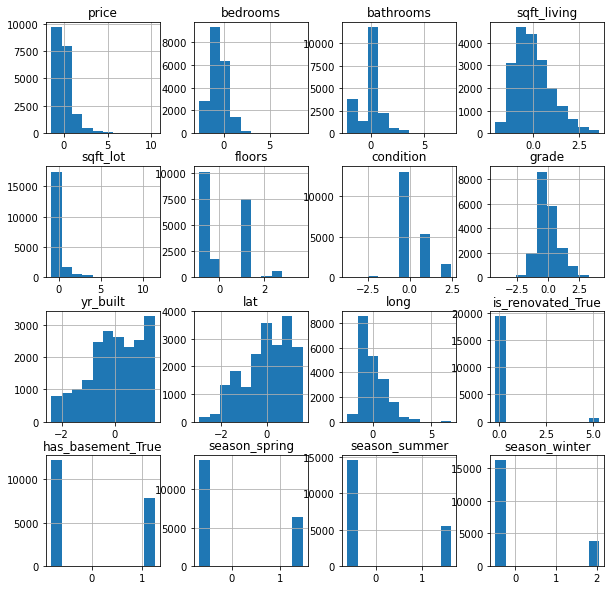

In [61]:
dummy_scaled.hist(figsize=[10,10])

In [62]:
dummy_log.drop(labels= ['lat', 'long'], axis=1, inplace=True)
dummy_log

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,is_renovated_True,has_basement_True,season_spring,season_summer,season_winter
id,,,,,,,,,,,,,,
7129300520,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,1.098612,1.945910,7.578145,0,0,0,0,0
6414100192,13.195614,1.098612,0.693147,7.851661,8.887653,0.693147,1.098612,1.945910,7.576097,1,1,0,0,0
5631500400,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,1.098612,1.791759,7.566828,0,0,0,0,1
2487200875,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,1.609438,1.945910,7.583248,0,1,0,0,0
1954400510,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,1.098612,2.079442,7.594381,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,12.793859,1.098612,0.916291,7.333023,7.030857,1.098612,1.098612,2.079442,7.605392,0,0,1,0,0
6600060120,12.899220,1.386294,0.916291,7.745003,8.667852,0.693147,1.098612,2.079442,7.607878,0,0,0,0,1
1523300141,12.904459,0.693147,0.000000,6.927558,7.207860,0.693147,1.098612,1.945910,7.605392,0,0,1,0,0


Text(0.5, 1.0, 'Price Vs. Square Feet')

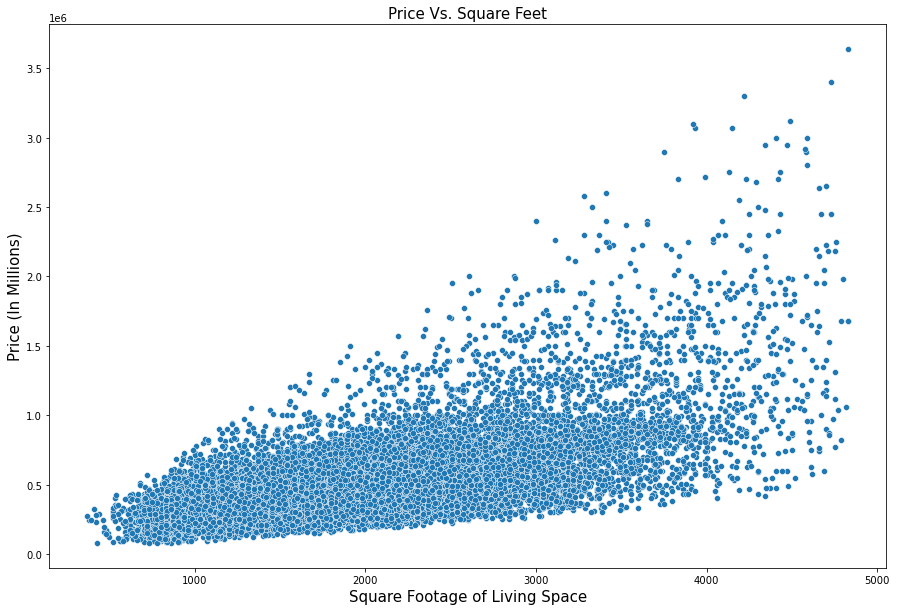

In [123]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='sqft_living', y='price', data=dummy)
ax.set_xlabel('Square Footage of Living Space', fontsize=15)
ax.set_ylabel('Price (In Millions)', fontsize=15)
ax.set_title("Price Vs. Square Feet", fontsize=15)

In [63]:
#Possibly get rid of some variables in rfv 
#transfomrations 
#drop some variables(log, lat )

#Questions to ask Lindsey
#